# BlobETL Class

<font size=4 color="#EBB483">BlobETL is a class for transforming arbitrarily nested blob data structures.

In [1]:
from rolling_pin.blob_etl import BlobETL

<font size=4 color="#EBB483">Below is an example of a blob with a repeating data structure.

In [76]:
blob = dict(
    a=dict(
        b=[
            dict(            # <--|
                c='foo',     #    |   repeated structure
                d=dict(      #    |__   of 2 branches
                    e='taco' #    |   a/b/list/c and a/b/list/d/e  
                )            #    |
            ),               # <--|
            dict(
                c='foo',
                d=dict(
                    e='pizza'
                )
            ),
            dict(
                c='bar',
                d=dict(
                    e='taco'
                )
            ),
            dict(
                c='foo',
                d=dict(
                    e='kiwi'
                )
            ),
            dict(
                unique='bar',
                d=dict(
                    e='pizza'
                )
            )
        ]
    )
)

In [100]:
etl = BlobETL(blob)
etl

<font size=4 color="#EBB483"><br>**to_html** converts the given blob to tree defined in HTML, or an image of said HTML.

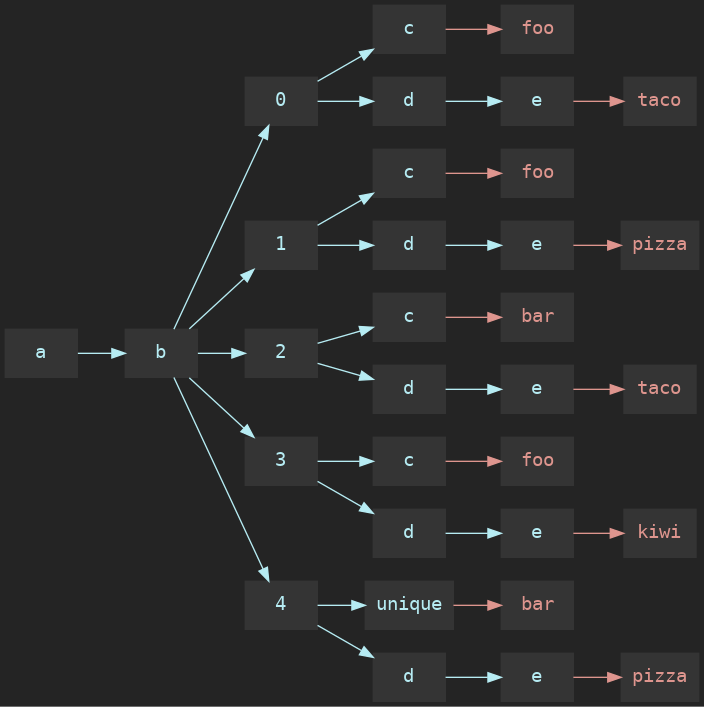

In [78]:
etl.to_html(orient='lr', as_png=True)

<font size=4 color="#EBB483"><br>**to_flat_dict** returns the blob data as a flattened dictionary.

In [79]:
etl.to_flat_dict()

{'a/b/<list_0>/c': 'foo',
 'a/b/<list_0>/d/e': 'taco',
 'a/b/<list_1>/c': 'foo',
 'a/b/<list_1>/d/e': 'pizza',
 'a/b/<list_2>/c': 'bar',
 'a/b/<list_2>/d/e': 'taco',
 'a/b/<list_3>/c': 'foo',
 'a/b/<list_3>/d/e': 'kiwi',
 'a/b/<list_4>/unique': 'bar',
 'a/b/<list_4>/d/e': 'pizza'}

<font size=4 color="#EBB483"><br>**to_dataframe** returns the blob data as a pandas DataFrame.

In [80]:
etl.to_dataframe()

,0,1,2,3,4,value
0,a,b,<list_0>,c,NaN,foo
1,a,b,<list_0>,d,e,taco
2,a,b,<list_1>,c,NaN,foo
3,a,b,<list_1>,d,e,pizza
4,a,b,<list_2>,c,NaN,bar
5,a,b,<list_2>,d,e,taco
6,a,b,<list_3>,c,NaN,foo
7,a,b,<list_3>,d,e,kiwi
8,a,b,<list_4>,unique,NaN,bar
9,a,b,<list_4>,d,e,pizza


<font size=4 color="#EBB483"><br>**to_records** returns the blob data as a list of dicts.

The keys are the tree level and the values are the node value.

In [81]:
etl.to_records()

[{0: 'a', 1: 'b', 2: '<list_0>', 3: 'c', 'value': 'foo'},
 {0: 'a', 1: 'b', 2: '<list_0>', 3: 'd', 4: 'e', 'value': 'taco'},
 {0: 'a', 1: 'b', 2: '<list_1>', 3: 'c', 'value': 'foo'},
 {0: 'a', 1: 'b', 2: '<list_1>', 3: 'd', 4: 'e', 'value': 'pizza'},
 {0: 'a', 1: 'b', 2: '<list_2>', 3: 'c', 'value': 'bar'},
 {0: 'a', 1: 'b', 2: '<list_2>', 3: 'd', 4: 'e', 'value': 'taco'},
 {0: 'a', 1: 'b', 2: '<list_3>', 3: 'c', 'value': 'foo'},
 {0: 'a', 1: 'b', 2: '<list_3>', 3: 'd', 4: 'e', 'value': 'kiwi'},
 {0: 'a', 1: 'b', 2: '<list_4>', 3: 'unique', 'value': 'bar'},
 {0: 'a', 1: 'b', 2: '<list_4>', 3: 'd', 4: 'e', 'value': 'pizza'}]

<font size=4 color="#EBB483"><br>**to_networkx_graph** converts blob data to a NetworkX graph.

In [82]:
etl.to_networkx_graph()

<font size=4 color="#EBB483"><br>**to_dot_graph** converts blob data to a dot graph.

In [83]:
etl.to_dot_graph()

<font size=4 color="#EBB483"><br>**to_prototype** collapses repetitive tree structure into singlular branches under generated regular expressions.

With the blob data there is a list. Its items are dictionaries which follow a prototypical structure:
```
{
    'c': ...,
    'd': {
        'e': ...
    }
}
```

The prototypical flattened representation of the branch paths to each of these values is as follows:

* a/b/\<list>/c
* a/b/\<list>/d/e 
    
**to_prototype** merge repeat paths under a regular expression, and set the the lead node to be the count of the collapsed branches.
Thus only unique branches are left behind. Notice *unique$* is present.

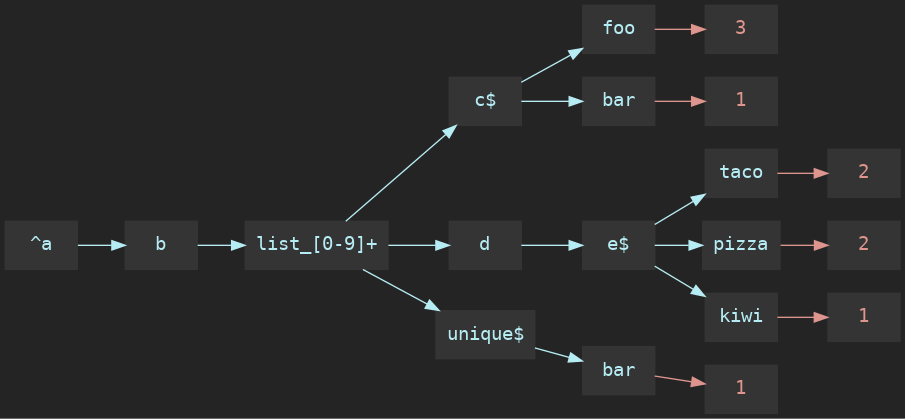

In [84]:
etl \
    .to_prototype() \
    .to_html(orient='lr', as_png=True)

<font size=4 color="#EBB483"><br>**set** assigns values to keys and values inside BlobETL according to given functions.
    
In this example, for all branches except the one containing the "unique" node, we conver the node names to uppercase, and set the leaf node values to empty string.
    
This has the effect of splitting the blob tree into two:
One tree for the non-unique branches and one for the unique branch.

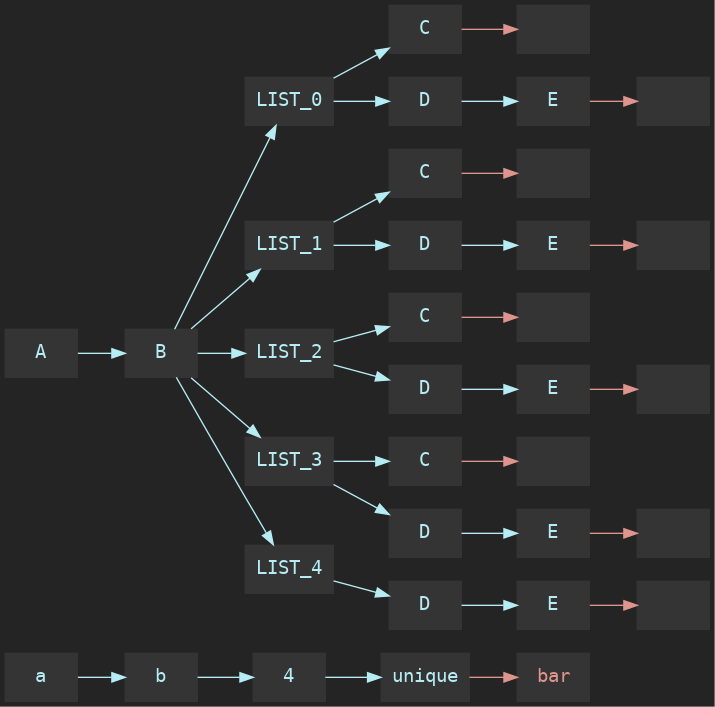

In [87]:
etl \
    .set(
        predicate=lambda k, v: 'unique' not in k,
        key_setter=lambda k, v: k.upper(),
        value_setter=lambda k, v: '',
    ) \
    .to_html(orient='lr', as_png=True)

<font size=4 color="#EBB483"><br>**set_field** applies a given function to all nodes of a certain hierarchical level.
    
In this case, all the nodes x beneath b (ie the \<list_x> nodes), are being renamed to "ITEM-000x".

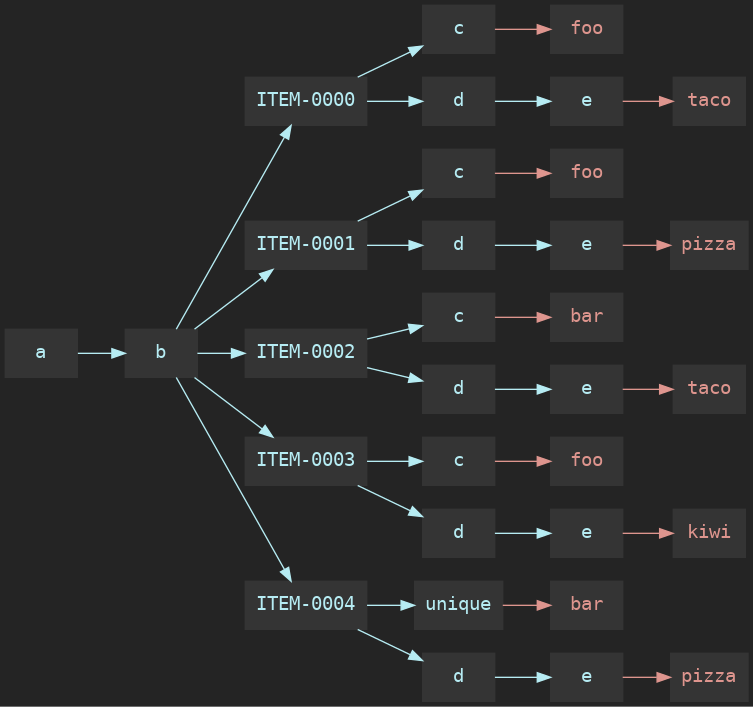

In [86]:
etl \
    .set_field(2, lambda x: f'ITEM-{int(x[6]):04d}') \
    .to_html(orient='lr', as_png=True)

<font size=4 color="#EBB483"><br>**filter** applies a given predicate to the keys or values of the BlobETL internal data, culling it.
    
In this case, **filter** is used to remove the unique branch.

In [75]:
etl.filter(lambda x: 'unique' in x, by='key', invert=True).to_flat_dict()

{'a/b/<list_0>/c': 'foo',
 'a/b/<list_0>/d/e': 'taco',
 'a/b/<list_1>/c': 'foo',
 'a/b/<list_1>/d/e': 'pizza',
 'a/b/<list_2>/c': 'bar',
 'a/b/<list_2>/d/e': 'taco',
 'a/b/<list_3>/c': 'foo',
 'a/b/<list_3>/d/e': 'kiwi',
 'a/b/<list_4>/d/e': 'pizza'}

<font size=4 color="#EBB483"><br>**query** is like filter except that its predicate is applied as a regular expression to only the BlobETL keys.
    
In this case, **query** is used to select only the keys which have a 'c' or 'unique' field.

In [108]:
etl.query('/c|/unique').to_flat_dict()

{'a/b/<list_0>/c': 'foo',
 'a/b/<list_1>/c': 'foo',
 'a/b/<list_2>/c': 'bar',
 'a/b/<list_3>/c': 'foo',
 'a/b/<list_4>/unique': 'bar'}

<font size=4 color="#EBB483"><br>**delete** deletes all branches which match a given predicate.
    
In this case, all branch with "taco" leaf nodes are removed.

In [91]:
etl.delete(lambda x: x == 'taco', by='value').to_flat_dict()

{'a/b/<list_0>/c': 'foo',
 'a/b/<list_1>/c': 'foo',
 'a/b/<list_1>/d/e': 'pizza',
 'a/b/<list_2>/c': 'bar',
 'a/b/<list_3>/c': 'foo',
 'a/b/<list_3>/d/e': 'kiwi',
 'a/b/<list_4>/unique': 'bar',
 'a/b/<list_4>/d/e': 'pizza'}

<font size=4 color="#EBB483"><br>**update** updates the internal BlobETL data with a given dictionary.
    
In this case, we add a branch with the nodes N1 and N2 to the root node a.

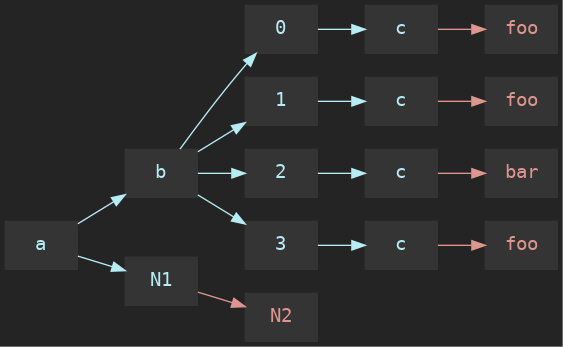

In [119]:
etl \
    .query('/c') \
    .update({'a': {'N1': 'N2'}}) \
    .to_html(orient='lr', as_png=True)

<font size=4 color="#EBB483"><br>**write** writes blob data to a file in SVG, PNG, DOT or JSON format.

In [ ]:
etl.write('/some/path/blob.svg)